### Reinforcement Learning - Resource Manager

Version 1.4:

- Implement static environment   
    - Gave more reward around the water resource



### Imports

In [1]:
import gym
import numpy as np
from gym.envs.registration import register
import matplotlib.pyplot as plt

### Environment

In [2]:
from ResourceManagerEnvironment_v1_4 import ResourceManagerEnv
from MonteCarloTreeSearch import Node, MonteCarloTreeSearch

In [3]:
register(
    id='Resource-Manager-v1-4',
    entry_point='ResourceManagerEnvironment_v1_4:ResourceManagerEnv',
    kwargs={
        'grid_size': 20,           #set to desired grid size
        'window_size': 300,        #set to desired window size
        'num_water_resources': 10,  #set to desired number of water resources
        'render_mode': 'rgb_array'     #set to desired render mode ('human' or 'rgb_array')
    },
    max_episode_steps=500,
)


In [4]:
env = gym.make('Resource-Manager-v1-4')
num_episodes = 50

#lists to store rewards and water resources
episode_rewards = []
episode_water_resources = []

#run episodes
for episode in range(num_episodes):
    observation = env.reset()
    total_reward = 0
    total_water_resource = env.initial_water

    while True:
        #using random action selection for now
        action = env.action_space.sample()
        #take a step in the environment
        observation, reward, done, truncated, info = env.step(action)

        #accumulate the total reward for the episode
        total_reward += reward

        # Optionally, render the environment
        env.render()

        if done:
            break

    # Append episode results to lists
    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)

    print(f"Episode {episode + 1}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}")



c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (20, 20)
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
c:\Users\denni\.conda\envs\tf\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a de

Episode 1, Total Reward: 68, Total Water Resource: -0.5
Episode 2, Total Reward: -197, Total Water Resource: -0.5
Episode 3, Total Reward: -159, Total Water Resource: -0.5
Episode 4, Total Reward: -214, Total Water Resource: -0.5
Episode 5, Total Reward: 50, Total Water Resource: -0.5
Episode 6, Total Reward: -245, Total Water Resource: -0.5
Episode 7, Total Reward: -204, Total Water Resource: -0.5
Episode 8, Total Reward: -167, Total Water Resource: -0.5
Episode 9, Total Reward: -424, Total Water Resource: -0.5
Episode 10, Total Reward: -285, Total Water Resource: -0.5
Episode 11, Total Reward: -275, Total Water Resource: -0.5
Episode 12, Total Reward: -419, Total Water Resource: -0.5
Episode 13, Total Reward: -221, Total Water Resource: -0.5
Episode 14, Total Reward: -241, Total Water Resource: -0.5
Episode 15, Total Reward: -134, Total Water Resource: -0.5
Episode 16, Total Reward: -245, Total Water Resource: -0.5
Episode 17, Total Reward: 51, Total Water Resource: -0.5
Episode 18, 

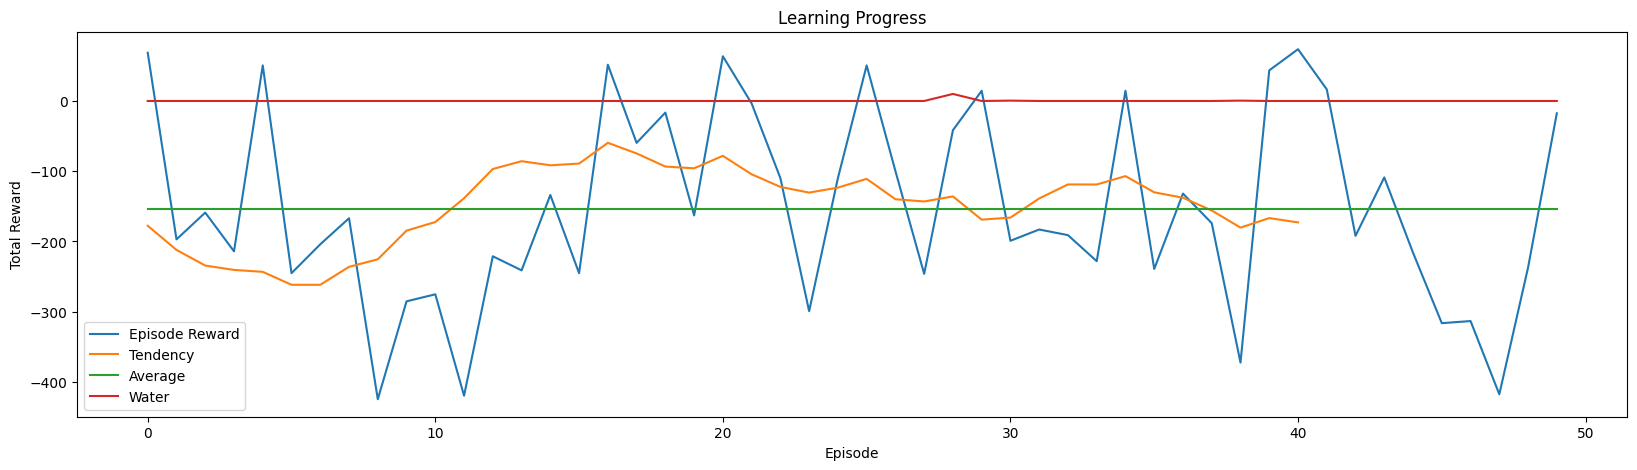

In [5]:
#Plot the total rewards
plt.figure(figsize=(20,5))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress')
#plot tendency curve
plt.plot(np.convolve(episode_rewards, np.ones((10,))/10, mode='valid'))
#plot average
plt.plot(np.ones(len(episode_rewards))*np.mean(episode_rewards))
plt.plot(episode_water_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water'])
plt.show()


## Monte Carlo Tree Search

Definitionen:

Iterations:
Anzahl, wie oft die Simulation durchlaufen werden soll

Simulation Steps:
Anzahl, wie oft der Algorithmus gemacht werden soll

Episoden:
Anzahl, wie oft der komplette Suchalgorithmus mit MCTS gemacht werden soll

In [6]:
env = gym.make('Resource-Manager-v1-4')
num_episodes = 5
mcts = MonteCarloTreeSearch(env, iterations=500, simulation_steps=10)
episode_rewards = []
episode_water_resources = []

for episode in range(num_episodes):
    #reset the environment for a new episode
    state = env.reset()
    total_reward = 0
    total_water_resource = env.initial_water

    #initialize the root node with the current state
    root = Node(state=state)

    while True:
        #perform the search and get the best action
        best_action = mcts.search()
        #perform the selected action in the environment
        new_state, reward, done, truncated, info = env.step(best_action)
        #update the root node with the new state
        total_reward += reward
        if done:
            break

    episode_rewards.append(total_reward)
    episode_water_resources.append(env.water_resource)

    print(f"Episode {episode + 1}, Total Reward: {total_reward}, Total Water Resource: {env.water_resource}")



KeyboardInterrupt: 

## Evaluation

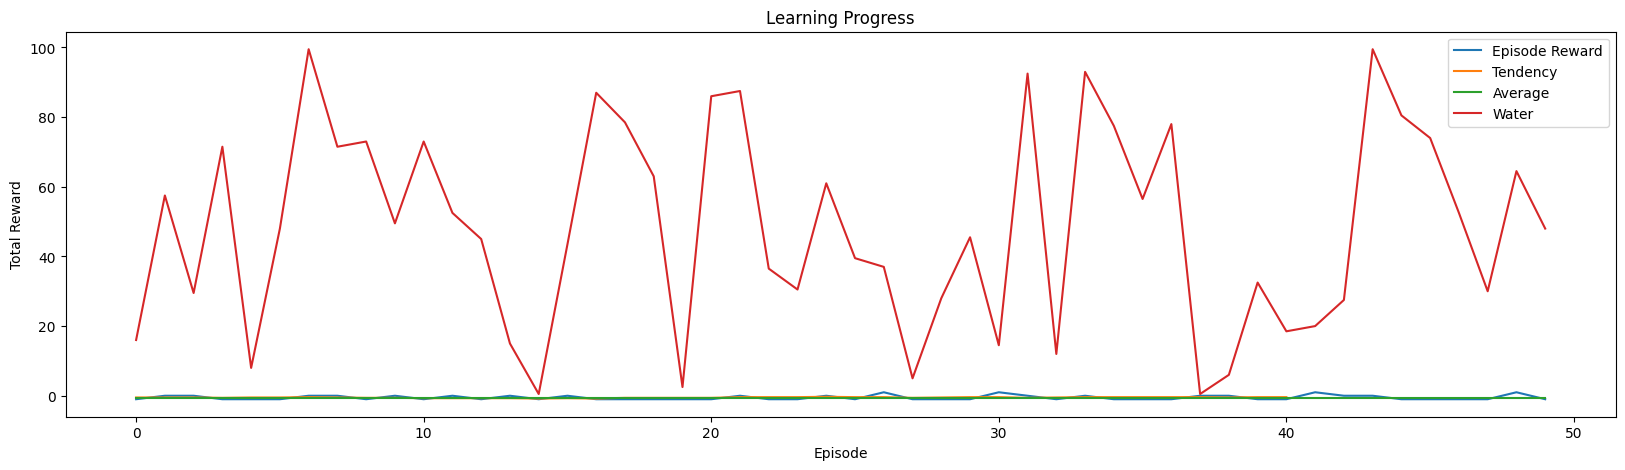

In [9]:
#Plot the total rewards
plt.figure(figsize=(20,5))
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Learning Progress')
#plot tendency curve
plt.plot(np.convolve(episode_rewards, np.ones((10,))/10, mode='valid'))
#plot average
plt.plot(np.ones(len(episode_rewards))*np.mean(episode_rewards))
plt.plot(episode_water_resources)
plt.legend(['Episode Reward', 'Tendency', 'Average', 'Water'])
plt.show()
